In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("train_.csv")

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df = df[["Gender", "Married", "Education", "ApplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History", "Loan_Status"]]
df.head()

,Gender,Married,Education,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,Male,No,Graduate,5849,NaN,360.0,1.0,Y
1,Male,Yes,Graduate,4583,128.0,360.0,1.0,N
2,Male,Yes,Graduate,3000,66.0,360.0,1.0,Y
3,Male,Yes,Not Graduate,2583,120.0,360.0,1.0,Y
4,Male,No,Graduate,6000,141.0,360.0,1.0,Y


In [6]:
df = df[df["Loan_Status"].notnull()]
df.head()

,Gender,Married,Education,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,Male,No,Graduate,5849,NaN,360.0,1.0,Y
1,Male,Yes,Graduate,4583,128.0,360.0,1.0,N
2,Male,Yes,Graduate,3000,66.0,360.0,1.0,Y
3,Male,Yes,Not Graduate,2583,120.0,360.0,1.0,Y
4,Male,No,Graduate,6000,141.0,360.0,1.0,Y


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            601 non-null    object 
 1   Married           611 non-null    object 
 2   Education         614 non-null    object 
 3   ApplicantIncome   614 non-null    int64  
 4   LoanAmount        592 non-null    float64
 5   Loan_Amount_Term  600 non-null    float64
 6   Credit_History    564 non-null    float64
 7   Loan_Status       614 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 43.2+ KB


In [8]:
df = df.dropna()
df.isnull().sum()

Gender              0
Married             0
Education           0
ApplicantIncome     0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Loan_Status         0
dtype: int64

In [9]:
df['Loan_Status'].value_counts()

Y    357
N    158
Name: Loan_Status, dtype: int64

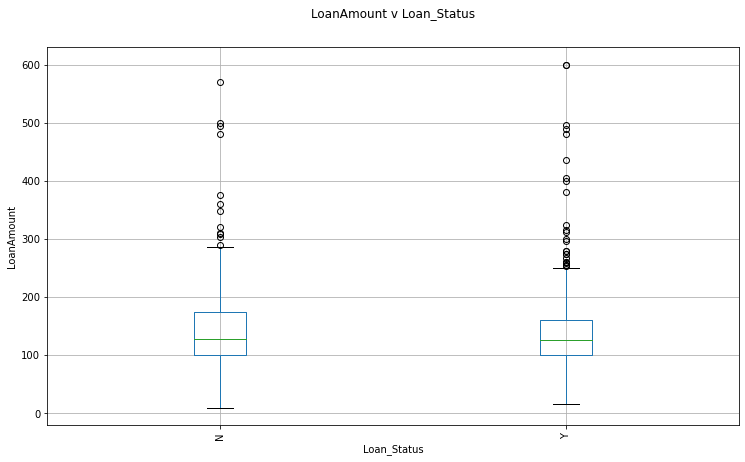

In [10]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('LoanAmount', 'Loan_Status', ax=ax)
plt.suptitle('LoanAmount v Loan_Status')
plt.title('')
plt.ylabel('LoanAmount')
plt.xticks(rotation=90)
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['Education'] = le_education.fit_transform(df['Education'])
df['Education'].unique()

array([0, 1])

In [12]:
le_married = LabelEncoder()
df['Married'] = le_married.fit_transform(df['Married'])
df['Married'].unique()

array([1, 0])

In [13]:
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])
df['Gender'].unique()

array([1, 0])

In [14]:
le_lstatus = LabelEncoder()
df['Loan_Status'] = le_lstatus.fit_transform(df['Loan_Status'])
df['Loan_Status'].unique()

array([0, 1])

In [15]:
x = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

In [16]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(x, y.values)

LinearRegression()

In [17]:
y_pred = linear_reg.predict(x)

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))

In [19]:
error

0.38320992364477124

In [20]:
x

,Gender,Married,Education,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
1,1,1,0,4583,128.0,360.0,1.0
2,1,1,0,3000,66.0,360.0,1.0
3,1,1,1,2583,120.0,360.0,1.0
4,1,0,0,6000,141.0,360.0,1.0
5,1,1,0,5417,267.0,360.0,1.0
...,...,...,...,...,...,...,...
609,0,0,0,2900,71.0,360.0,1.0
610,1,1,0,4106,40.0,180.0,1.0
611,1,1,0,8072,253.0,360.0,1.0
612,1,1,0,7583,187.0,360.0,1.0


In [21]:
x = np.array([["Male", "Yes", "Not Graduate", 4333, 222, 180, 1]])
x

array([['Male', 'Yes', 'Not Graduate', '4333', '222', '180', '1']],
      dtype='<U12')

In [22]:
x[:, 0] = le_gender.transform(x[:, 0])
x[:, 1] = le_married.transform(x[:, 1])
x[:, 2] = le_education.transform(x[:, 2])
x = x.astype(float)
x

array([[1.000e+00, 1.000e+00, 1.000e+00, 4.333e+03, 2.220e+02, 1.800e+02,
        1.000e+00]])

In [23]:
y_pred = linear_reg.predict(x)
y_pred

array([0.76846635])

In [24]:
import pickle

In [25]:
data = {"model" : linear_reg, "le_gender": le_gender, "le_married": le_married, "le_education": le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [26]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

linear_reg_load = data["model"]
le_gender = data["le_gender"]
le_married = data["le_married"]
le_education = data["le_education"]

In [27]:
y_pred = linear_reg_load.predict(x)
y_pred

array([0.76846635])